In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_dir = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset'


In [ ]:
import numpy as np



* Defining the dimensions of the input images as image_width and image_height (both set to 224 pixels).

* Specifying the batch size for loading the data as batch_size (set to 32).


* Creating an ImageDataGenerator object datagen for data augmentation, which rescales the image pixel values to the range [0, 1].
* Loading the data from the dataset directory using the flow_from_directory function of the datagen object. The images are resized to image_width and image_height, and the labels are encoded using one-hot categorical encoding.

* Splitting the data into training and test sets using the train_test_split function from sklearn.model_selection. The test set size is set to 20% of the data, and a random state of 42 is used for reproducibility.









In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Set the dimensions of the input images
image_width, image_height = 224, 224

# Set batch size for loading the data
batch_size = 32

# Set the number of classes
num_classes = 3

# Data augmentation for images
datagen = ImageDataGenerator(rescale=1./255)

# Load the data from the dataset directory
data_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Split the data into X and y
X, y = [], []
for i in range(len(data_generator)):
    batch_X, batch_y = data_generator[i]
    X.append(batch_X)
    y.append(batch_y)

# Concatenate the batches into a single array
X = np.concatenate(X)
y = np.concatenate(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Found 1104 images belonging to 4 classes.
X_train shape: (883, 224, 224, 3)
y_train shape: (883, 4)
X_test shape: (221, 224, 224, 3)
y_test shape: (221, 4)


### Converting labels to one hot encoded vectors

In [ ]:
from keras.utils import to_categorical

# Convert labels to one-hot encoded vectors
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)


<span>We define a CNN model for multi-class classification. The model consists of convolutional and pooling layers followed by fully connected layers. We compile the model with the Adam optimizer, categorical cross-entropy loss function, and accuracy metric. Training the model on X_train and y_train for 10 epochs with a batch size of 32, we validate its performance on X_test and y_test. This code enables us to train and evaluate a CNN model for multi-class classification tasks on our dataset.<span>

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, accuracy_score


# Define the number of classes
num_classes = 4
# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/10
28/28 [==============================] - 4s 75ms/step - loss: 1.5313 - accuracy: 0.7429 - val_loss: 0.2577 - val_accuracy: 0.9050
Epoch 2/10
28/28 [==============================] - 1s 53ms/step - loss: 0.1344 - accuracy: 0.9581 - val_loss: 0.0510 - val_accuracy: 0.9864
Epoch 3/10
28/28 [==============================] - 1s 49ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.0256 - val_accuracy: 0.9910
Epoch 4/10
28/28 [==============================] - 1s 49ms/step - loss: 0.0361 - accuracy: 0.9943 - val_loss: 0.0252 - val_accuracy: 0.9910
Epoch 5/10
28/28 [==============================] - 1s 48ms/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.0230 - val_accuracy: 0.9910
Epoch 6/10
28/28 [==============================] - 2s 65ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 7/10
28/28 [==============================] - 1s 50ms/step - loss: 0.0051 - accuracy: 0.9977 - val_loss: 0.1056 - val_accuracy: 0.9729
Epoch 8/10
28

In [ ]:
# Evaluate the model
y_pred = cnn_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)
classification_rep = classification_report(y_true_labels, y_pred_labels)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

7/7 [==============================] - 0s 17ms/step
Accuracy: 0.995475113122172
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.99      1.00      1.00       107
           3       1.00      0.99      0.99       100

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



7/7 [==============================] - 0s 26ms/step


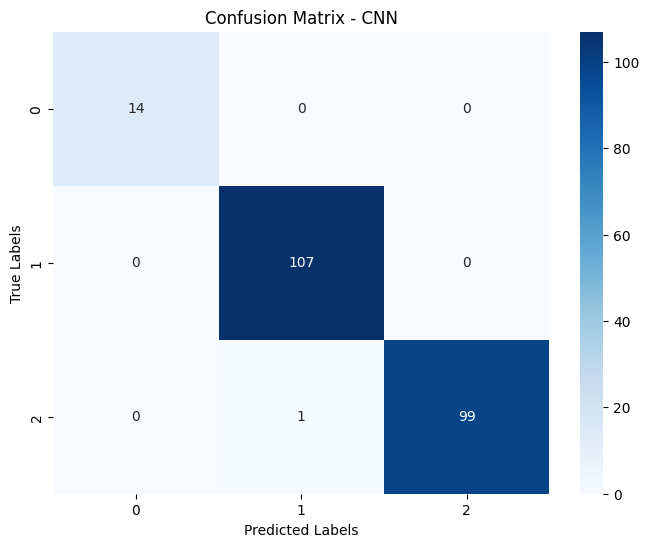

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = cnn_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

##Resnet 50


<span>We load the ResNet-50 model pretrained on the ImageNet dataset and remove its top layers. Custom layers are added, including a global average pooling layer, a dense layer with 128 units, and a final dense layer for class predictions. The model is compiled with SGD optimizer, categorical cross-entropy loss, and accuracy metric. Training the model on X_train and y_train for 10 epochs with a batch size of 32, we evaluate its performance on X_test and y_test. This code enables us to fine-tune the ResNet-50 model for multi-class classification on our dataset, leveraging its pre-trained features for improved accuracy and efficiency.<span>

In [ ]:

from keras.applications import ResNet50
from keras.optimizers import SGD
num_classes = 4 

# Load the ResNet-50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
renset_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
renset_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
renset_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/10
28/28 [==============================] - 16s 410ms/step - loss: 0.4712 - accuracy: 0.8313 - val_loss: 1.3484 - val_accuracy: 0.4163
Epoch 2/10
28/28 [==============================] - 10s 355ms/step - loss: 0.0920 - accuracy: 0.9819 - val_loss: 1.3071 - val_accuracy: 0.4842
Epoch 3/10
28/28 [==============================] - 10s 361ms/step - loss: 0.0319 - accuracy: 0.9977 - val_loss: 1.2093 - val_accuracy: 0.4842
Epoch 4/10
28/28 [==============================] - 10s 341ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 1.2174 - val_accuracy: 0.4842
Epoch 5/10
28/28 [==============================] - 10s 360ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 1.2845 - val_accuracy: 0.4842
Epoch 6/10
28/28 [==============================] - 9s 334ms/step - loss: 0.0115 - accuracy: 0.9989 - val_loss: 1.3257 - val_accuracy: 0.4842
Epoch 7/10
28/28 [==============================] - 10s 354ms/step - loss: 0.0088 - accuracy: 0.9989 - val_loss: 1.5690 - val_accuracy: 0.4842


In [ ]:
# Evaluate the model
y_pred_resnet = renset_model.predict(X_test)
y_pred_labels_resnet = np.argmax(y_pred_resnet, axis=1)
y_true_labels_resnet = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_labels_resnet, y_pred_labels_resnet)
precision = precision_score(y_true_labels_resnet, y_pred_labels_resnet, average='weighted')
recall = recall_score(y_true_labels_resnet, y_pred_labels_resnet, average='weighted')
f1 = f1_score(y_true_labels_resnet, y_pred_labels_resnet, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

7/7 [==============================] - 1s 101ms/step
Accuracy: 0.4841628959276018
Precision: 0.23441370979300177
Recall: 0.4841628959276018
F1-score: 0.31588676746495975


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


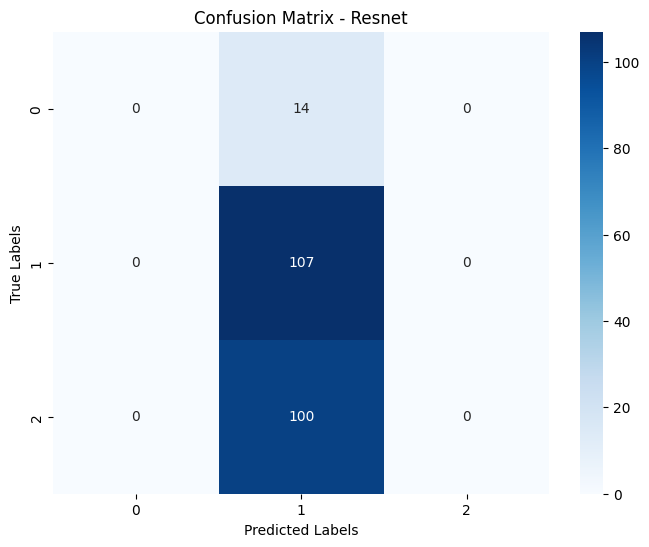

In [ ]:

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels_resnet, y_pred_labels_resnet)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Resnet')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## vgg


This code loads the VGG-16 model pre-trained on ImageNet and removes its top layers. Custom layers, including global average pooling and dense layers, are added for classification. The model is compiled with Adam optimizer, categorical cross-entropy loss, and accuracy metric. Training the model on X_train and y_train for 10 epochs with a batch size of 32, we evaluate its performance on X_test and y_test. By fine-tuning the VGG-16 model on our dataset, we can leverage its pre-trained features to achieve better accuracy and efficiency in multi-class classification tasks.

In [ ]:

from keras.applications import VGG16
# Load the VGG-16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
vgg_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
vgg_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/10
28/28 [==============================] - 13s 418ms/step - loss: 1.3786 - accuracy: 0.4870 - val_loss: 0.9257 - val_accuracy: 0.4525
Epoch 2/10
28/28 [==============================] - 11s 399ms/step - loss: 0.9755 - accuracy: 0.5210 - val_loss: 0.9362 - val_accuracy: 0.4842
Epoch 3/10
28/28 [==============================] - 12s 423ms/step - loss: 0.9710 - accuracy: 0.5085 - val_loss: 0.9281 - val_accuracy: 0.4842
Epoch 4/10
28/28 [==============================] - 11s 409ms/step - loss: 0.9777 - accuracy: 0.4983 - val_loss: 0.9051 - val_accuracy: 0.4842
Epoch 5/10
28/28 [==============================] - 12s 433ms/step - loss: 0.9627 - accuracy: 0.5096 - val_loss: 0.9040 - val_accuracy: 0.4842
Epoch 6/10
28/28 [==============================] - 12s 421ms/step - loss: 0.9768 - accuracy: 0.4870 - val_loss: 0.9368 - val_accuracy: 0.4842
Epoch 7/10
28/28 [==============================] - 12s 433ms/step - loss: 0.9734 - accuracy: 0.5221 - val_loss: 0.9232 - val_accuracy: 0.4842

In [ ]:
# Evaluate the model
y_pred_vgg = vgg_model.predict(X_test)
y_pred_labels_vgg = np.argmax(y_pred_vgg, axis=1)
y_true_labels_vgg = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_labels_vgg, y_pred_labels_vgg)
precision = precision_score(y_true_labels_vgg, y_pred_labels_vgg, average='weighted')
recall = recall_score(y_true_labels_vgg, y_pred_labels_vgg, average='weighted')
f1 = f1_score(y_true_labels_vgg, y_pred_labels_vgg, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

7/7 [==============================] - 1s 125ms/step
Accuracy: 0.4841628959276018
Precision: 0.23441370979300177
Recall: 0.4841628959276018
F1-score: 0.31588676746495975


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


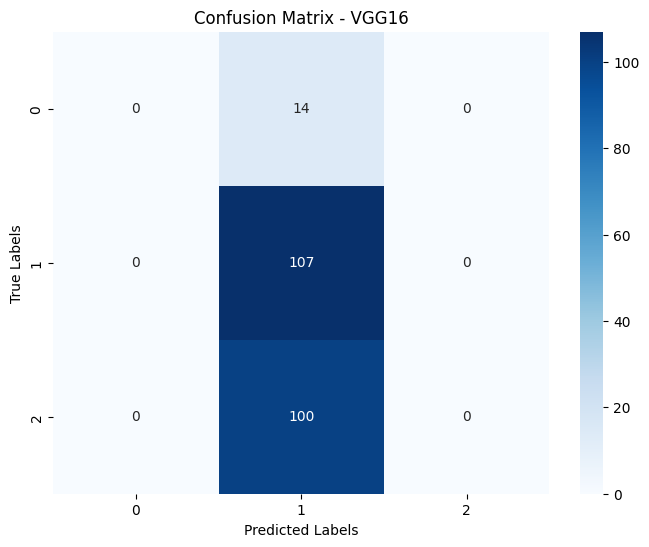

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_true_labels_vgg, y_pred_labels_vgg)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - VGG16')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
cnn_model.save('cnn_model.h5')
resnet_model.save('resnet_model.h5')
vgg_model.save('vgg_model.h5')

This code loads three saved models: cnn_model, resnet_model, and vgg_model. A list called bnn_models is created to store these models. The code then performs bootstrap sampling on the training data and randomly selects one of the models for each iteration. Predictions are made on the test data using the selected model, and the results are stored in ensemble_predictions. Finally, majority voting is applied to determine the final prediction for each test sample. This code demonstrates an ensemble method called bootstrap aggregation (bagging) to combine predictions from multiple models and improve the accuracy and robustness of the classification task.

In [ ]:

from sklearn.utils import resample
from keras.models import load_model

# Define the number of bootstrap models
num_models = 3

# Define the paths to the saved models
cnn_model_path = '/content/cnn_model.h5'
resnet_model_path = '/content/resnet_model.h5'
vgg_model_path = '/content/vgg_model.h5'

# Load the saved models
cnn_model = load_model(cnn_model_path)
resnet_model = load_model(resnet_model_path)
vgg_model = load_model(vgg_model_path)

# Create a list to store the loaded models
bnn_models = [cnn_model, resnet_model, vgg_model]

# Create a list to store the loaded models
bnn_models = [cnn_model, resnet_model, vgg_model]

# Create arrays to store the ensemble predictions and true labels
ensemble_predictions = np.zeros((num_models, len(X_test)), dtype=np.int64)
y_true_labels_bnn = np.argmax(y_test, axis=1)

# Bootstrap loop
for i in range(num_models):
    # Bootstrap sample the training data
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train_encoded, replace=True, random_state=i)
    
    # Randomly select one of the models
    bnn_model = np.random.choice(models)
    
    # Make predictions on the test data
    y_pred_bnn = bnn_model.predict(X_test)
    ensemble_predictions[i] = np.argmax(y_pred, axis=1)

# Majority voting for classification
ensemble_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=ensemble_predictions)



7/7 [==============================] - 1s 91ms/step


In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_true_labels_bnn, ensemble_predictions)
precision = precision_score(y_true_labels_bnn, ensemble_predictions, average='macro')
recall = recall_score(y_true_labels_bnn, ensemble_predictions, average='macro')
f1 = f1_score(y_true_labels_bnn, ensemble_predictions, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.995475113122172
Precision: 0.9969135802469135
Recall: 0.9966666666666667
F1-score: 0.9967745705270539


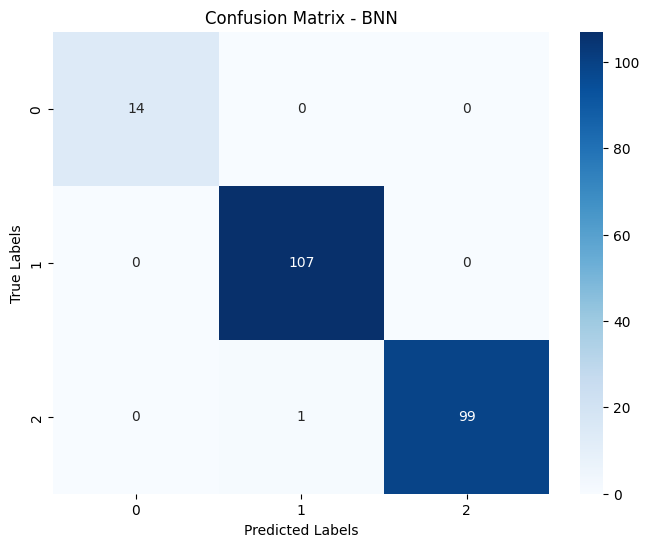

In [ ]:

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels_bnn, ensemble_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - BNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()